# Exploratory Data Analysis

**Social anxiety**, also known as social phobia, affects millions of people worldwide. It is often linked to a complex mix of behavioral patterns, psychological states, lifestyle choices, and genetic predispositions. This **synthetic dataset** was crafted to reflect real-world patterns and includes high-anxiety cases to support research in detection and intervention. 

**The objective**: To construct a model that will predict a level of `'Anxiety Score (1-10)'`.


**Features included**:
* **Demographics**: Age, Gender, Occupation
* **Lifestyle**: Sleep hours, Physical activity, Diet quality, Alcohol use, Caffeine intake, Smoking habits
* **Health & Mental Indicators**: Heart rate, Breathing rate, Stress level, Sweating level, Dizziness
* **Mental Health History**: Family history of anxiety, Use of medication, Therapy frequency
* **Life Events**: Recent major life events
* **Target Variable**: Anxiety Level (1-10) – Quantifies the individual’s social anxiety intensity



## Data cleaning

The first step is to conduct EDA - I want to check the range of the values in the dataset, missing values, number of categorical variables and potential inconsistencies in the data.

In [11]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [12]:
anxiety_data = pd.read_csv("enhanced_anxiety_dataset.csv")
anxiety_data.head(10)

,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Anxiety Level (1-10)
0,29,Female,Artist,6.0,2.7,181,10,Yes,No,10,114,14,4,No,Yes,3,Yes,7,5.0
1,46,Other,Nurse,6.2,5.7,200,8,Yes,Yes,1,62,23,2,Yes,No,2,No,8,3.0
2,64,Male,Other,5.0,3.7,117,4,No,Yes,1,91,28,3,No,No,1,Yes,1,1.0
3,20,Female,Scientist,5.8,2.8,360,6,Yes,No,4,86,17,3,No,No,0,No,1,2.0
4,49,Female,Other,8.2,2.3,247,4,Yes,No,1,98,19,4,Yes,Yes,1,No,3,1.0
5,53,Male,Other,6.4,6.5,235,2,No,No,9,84,14,3,No,Yes,2,Yes,5,4.0
6,20,Male,Artist,7.9,2.5,78,14,Yes,No,8,118,21,5,Yes,No,1,Yes,2,4.0
7,54,Female,Lawyer,6.3,5.5,535,15,No,No,5,113,19,1,No,No,0,No,7,4.0
8,51,Other,Lawyer,6.6,3.1,587,2,No,No,2,81,22,1,Yes,No,2,Yes,8,3.0
9,59,Female,Teacher,5.1,4.8,159,15,Yes,No,5,95,28,5,Yes,Yes,1,Yes,1,4.0


In [13]:
print(f"Total number of columns: {anxiety_data.shape[1]}")
anxiety_data.columns

Total number of columns: 19


Index(['Age', 'Gender', 'Occupation', 'Sleep Hours',
       'Physical Activity (hrs/week)', 'Caffeine Intake (mg/day)',
       'Alcohol Consumption (drinks/week)', 'Smoking',
       'Family History of Anxiety', 'Stress Level (1-10)', 'Heart Rate (bpm)',
       'Breathing Rate (breaths/min)', 'Sweating Level (1-5)', 'Dizziness',
       'Medication', 'Therapy Sessions (per month)', 'Recent Major Life Event',
       'Diet Quality (1-10)', 'Anxiety Level (1-10)'],
      dtype='object')

In [14]:
anxiety_data.describe()

,Age,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Therapy Sessions (per month),Diet Quality (1-10),Anxiety Level (1-10)
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000
mean,40.241727,6.650691,2.942136,286.090000,9.701636,5.856364,90.916000,20.957545,3.080636,2.427818,5.181818,3.929364
std,13.236140,1.227509,1.827825,144.813157,5.689713,2.927202,17.325721,5.160107,1.398877,2.183106,2.895243,2.122533
min,18.000000,2.300000,0.000000,0.000000,0.000000,1.000000,60.000000,12.000000,1.000000,0.000000,1.000000,1.000000
25%,29.000000,5.900000,1.500000,172.000000,5.000000,3.000000,76.000000,17.000000,2.000000,1.000000,3.000000,2.000000
50%,40.000000,6.700000,2.800000,273.000000,10.000000,6.000000,92.000000,21.000000,3.000000,2.000000,5.000000,4.000000
75%,51.000000,7.500000,4.200000,382.000000,15.000000,8.000000,106.000000,25.000000,4.000000,4.000000,8.000000,5.000000
max,64.000000,11.300000,10.100000,599.000000,19.000000,10.000000,119.000000,29.000000,5.000000,12.000000,10.000000,10.000000


In [15]:
# check for missing values and duplicates
print(f"There are {anxiety_data.isna().values.sum()} missing values in the dataset.")
print(f"There are {anxiety_data.duplicated(subset=None, keep='first').sum()} duplicates in the dataset.")

There are 0 missing values in the dataset.
There are 0 duplicates in the dataset.


In [16]:
# select only columns with numerical variables 
numerical_variables = anxiety_data.select_dtypes(include = ['int64','float64'])

# select only columns with categorical variables
categorical_variables = anxiety_data.select_dtypes(exclude = ['int64','float64'])

In [17]:
print(f"The number of numerical columns: {numerical_variables.shape[1]}")
print(f"The number of categorical columns: {categorical_variables.shape[1]}")

The number of numerical columns: 12
The number of categorical columns: 7


In [18]:
# get the unique entries in categorical columns
for column in categorical_variables.columns:
    print("-"*70)
    counts = anxiety_data[column].value_counts()
    num_unique_values = anxiety_data[column].nunique()
    print(f"There are {num_unique_values} unique values in the column: {counts}\n")

----------------------------------------------------------------------
There are 3 unique values in the column: Gender
Female    3730
Male      3657
Other     3613
Name: count, dtype: int64

----------------------------------------------------------------------
There are 13 unique values in the column: Occupation
Musician      892
Artist        888
Student       878
Nurse         861
Chef          858
Doctor        842
Other         840
Freelancer    838
Engineer      833
Scientist     832
Athlete       822
Lawyer        809
Teacher       807
Name: count, dtype: int64

----------------------------------------------------------------------
There are 2 unique values in the column: Smoking
Yes    5779
No     5221
Name: count, dtype: int64

----------------------------------------------------------------------
There are 2 unique values in the column: Family History of Anxiety
Yes    5847
No     5153
Name: count, dtype: int64

----------------------------------------------------------------

There are no missing values in the data, and there are no duplicates. There is a total of $19$ columns - $7$ numerical and $11$ categorical columns, including the target variable `"Anxiety Level (1-10)"` which is a numerical column. Almost all categorical columns have low cardinality (i.e. number of unique values) up to 3, with the exception of the `Occupation` variable which has $13$ unique values. This dataset is well-balanced, which is an advantage when preprocessing data later and building ML models. 

The target variable `"Anxiety Level (1-10)"` (along with some of the other variables) is technically a ordinal categorical variable, meaning that anxiety levels are ordered factors. However, in practice it is acceptable to treat it as a numerical variables, mainly with the purpose of model building and prediction, as regression models like Linear Regression works for numerical targets.

## Data Visualizations
Next I will proceed to visualizations in order to understand the data better. First, I will examine the target variable `"Anxiety Level (1-10)"`, to check the distribution of the variable. 

In [19]:
# get the distribution of anxiety levels
anxiety_data["Anxiety Level (1-10)"].value_counts()

Anxiety Level (1-10)
4.0     2416
3.0     2407
2.0     1756
5.0     1629
1.0     1039
6.0      616
8.0      363
9.0      329
10.0     322
7.0      123
Name: count, dtype: int64

<Axes: xlabel='Anxiety Level (1-10)', ylabel='Count'>

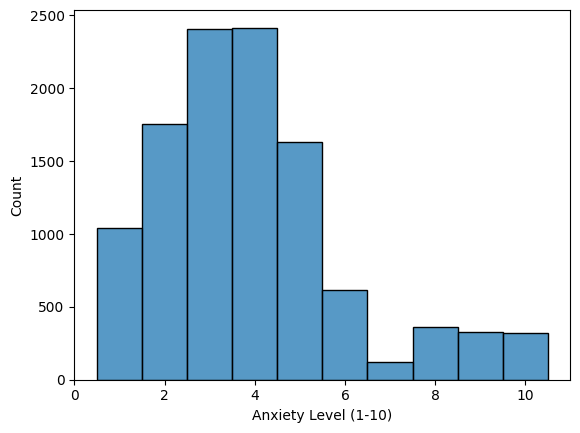

In [20]:
# plot the distribution of anxiety levels
sns.histplot(data=anxiety_data, x="Anxiety Level (1-10)", bins=10, discrete=True)

From the `histplot` for a target variable `"Anxiety Level (1-10)"`, it is apparent that the distribution is right - skewed (long tail to the right). This means that there are more values with a lower value of a target variable, compared to the higher values - for example, the value of $7$ is the least occuring one in this dataset. The skewness will be important during the modelling and feature engineering stages, as it can affect model assumptions and their performance.

Next, I will focus only on numerical variables, and do a `pairplot` in order to visually check for relationships between numerical variables. This will be only serve as a helping step, as potentially important graphs will be plotted later based on the insights of the `pairplot`. While some features are discrete, instead of continuous, this will help anyway to identify variables with potential linear trends or cluster values together.

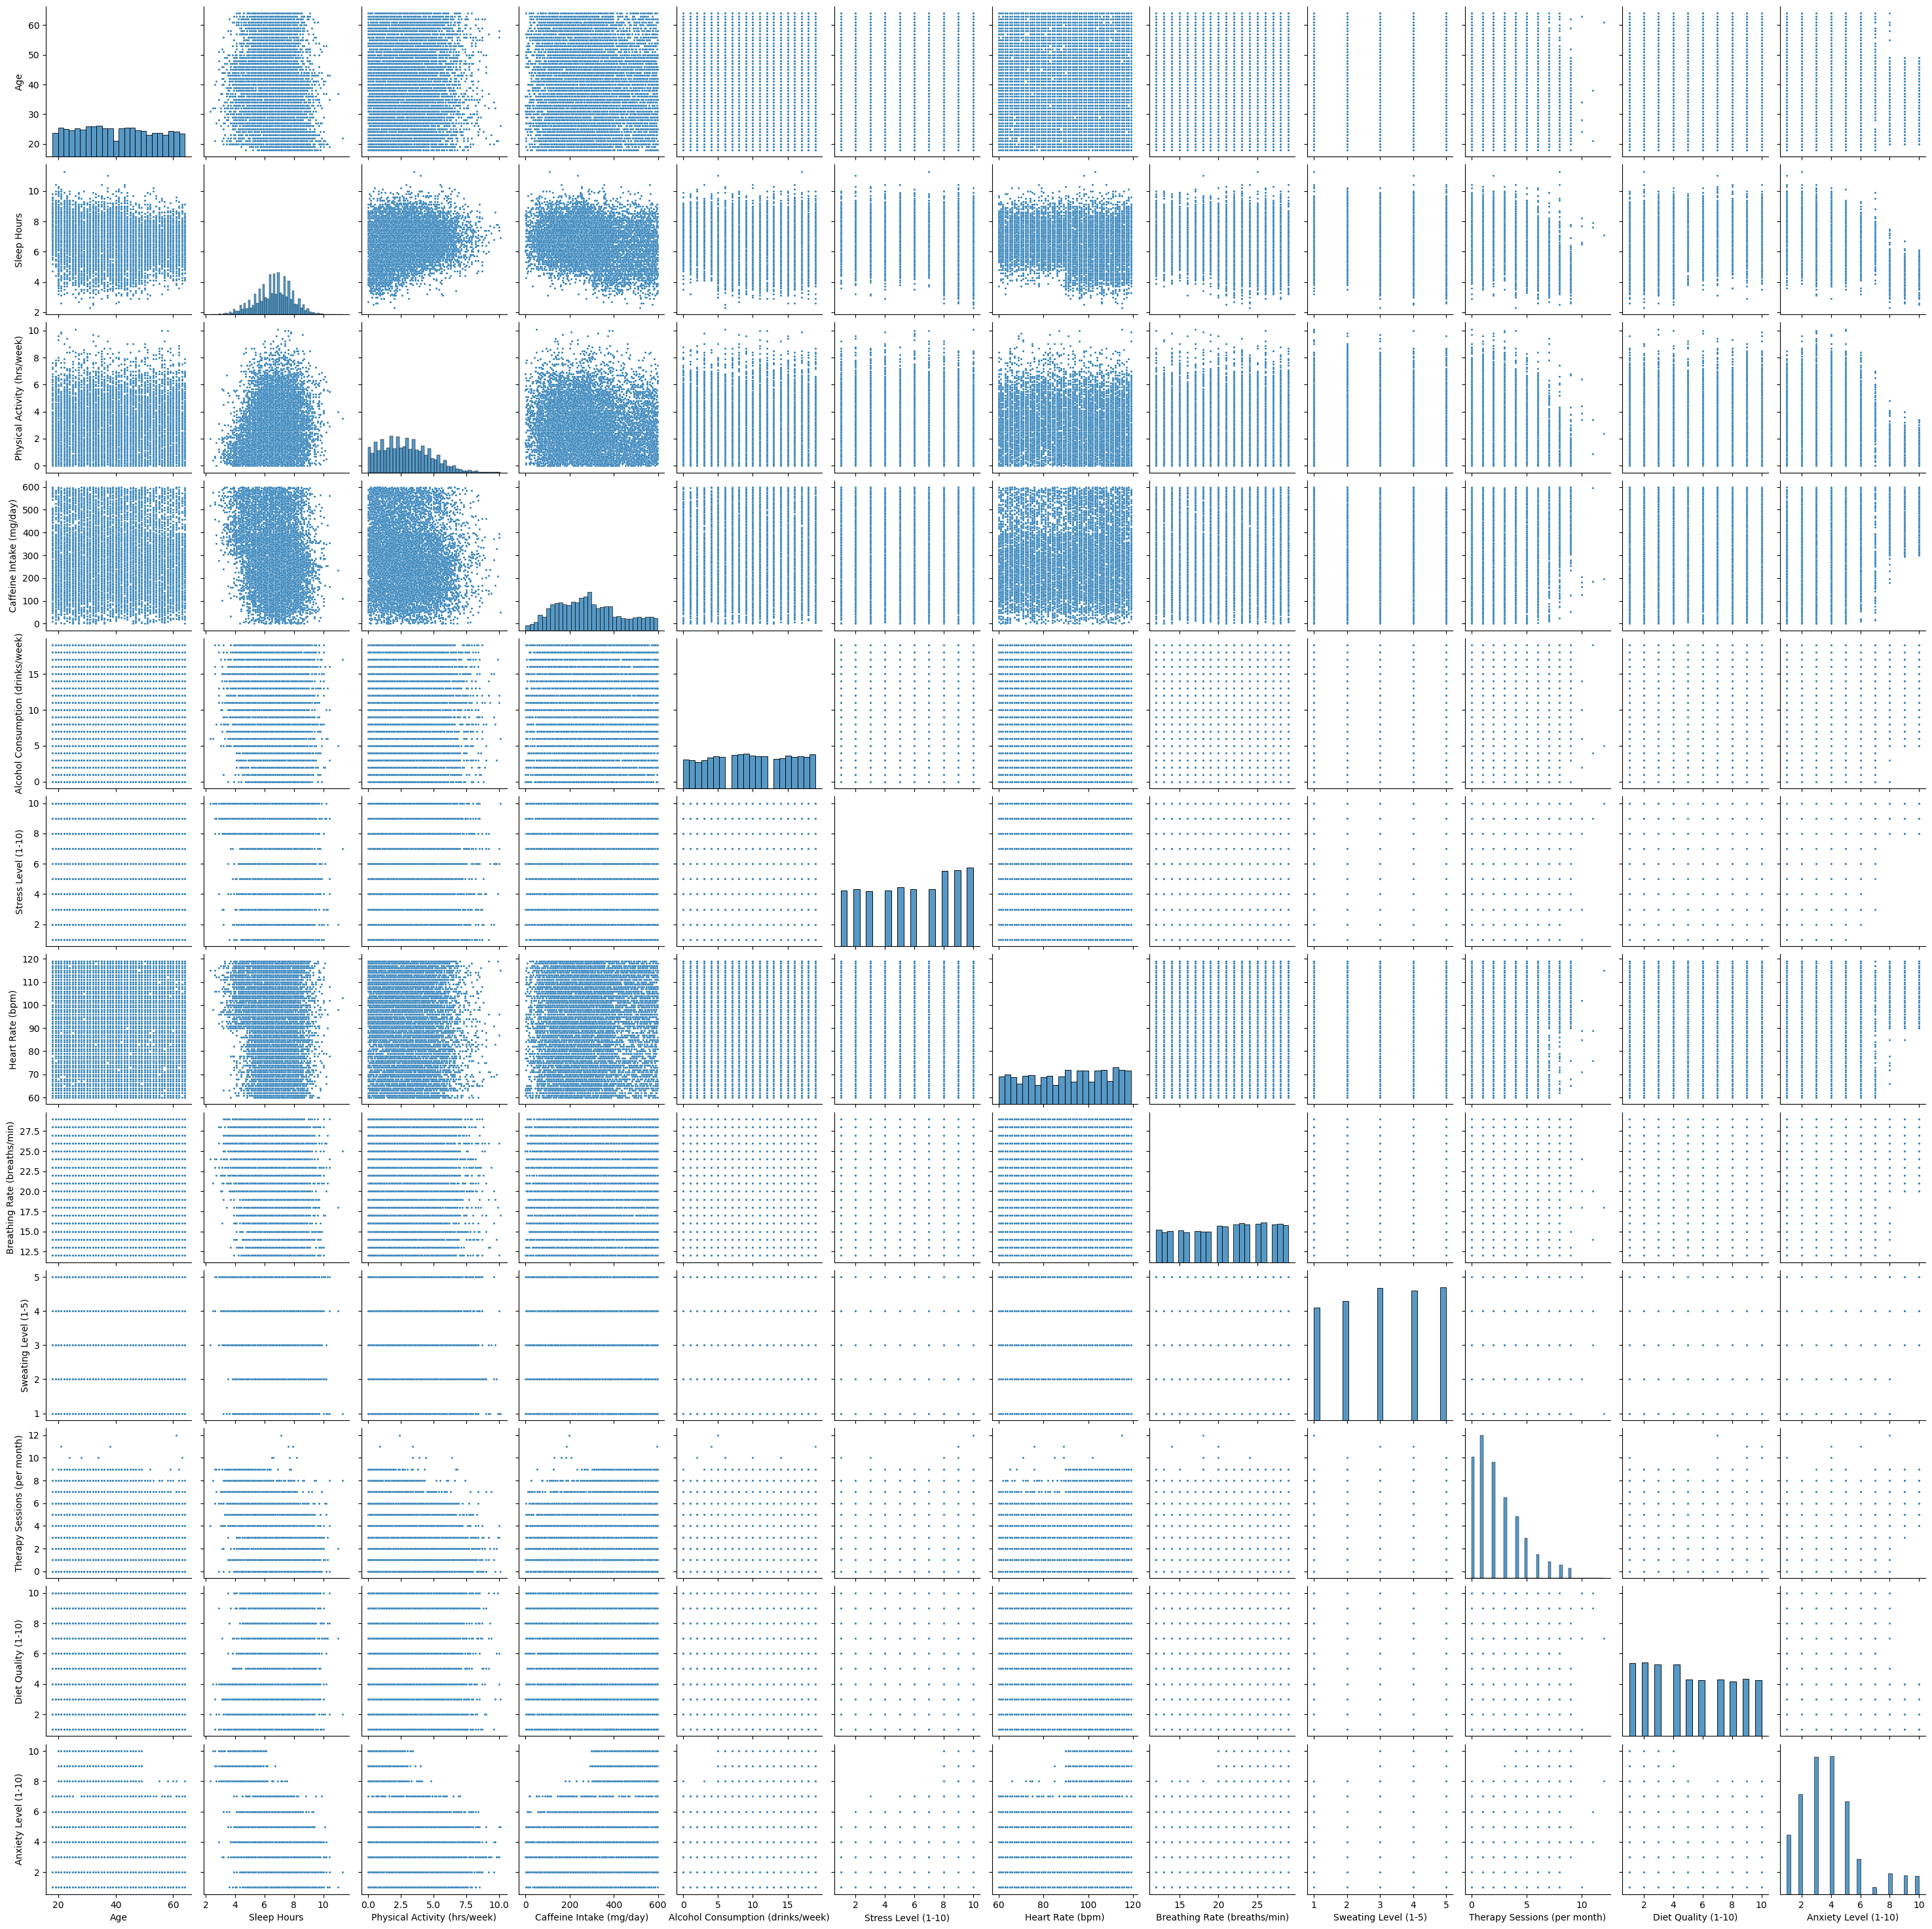

In [21]:
# pairplot to explore relationships between numeric features and guide further visualizations. 
sns.pairplot(numerical_variables, plot_kws={'s': 5})

The pairplot shows no obvious linear relationships between variables - the data appears noisy and complex. Hence, I have to rely on other methods to identify the correlation, like **correlation matrix** and **heatmaps**. 

First, I will compute the correlation matrix which measures the strength of a linear relationship using **Pearson's linear coefficient $r$**. 

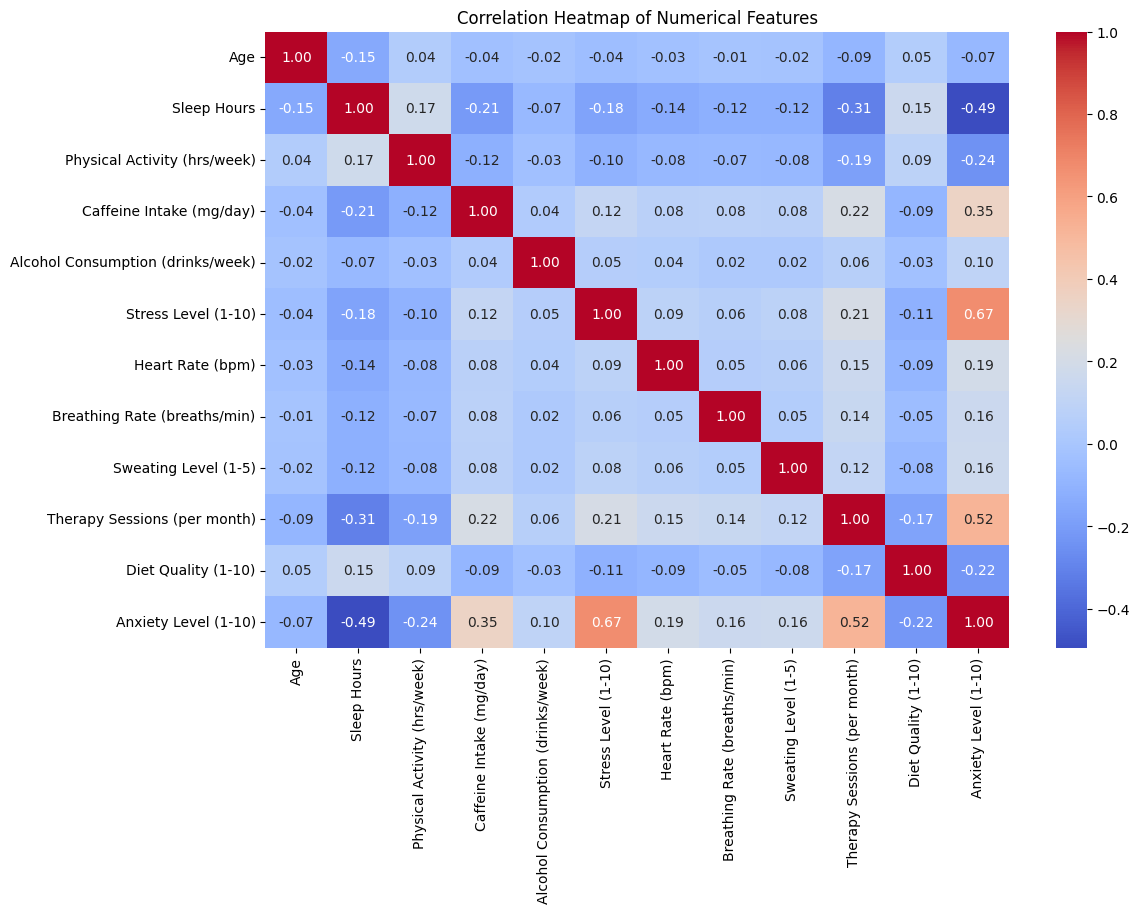

In [22]:
# compute correlation matrix
corr = numerical_variables.corr()

# plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

**Insights from the correlation heatmap plot for numerical features** regarding the target variable :
* It seems that **Stress Levels** have the highest (linear) correlation with **Anxiety**, with the coefficient of $0.67$, which is an indication of a strong positive relationship.

* **Therapy sessions per month** have the coefficient $0.52$ and positive correlation with **anxiety**, which seems logical because people with higher reported anxiety levels are more likely to seek therapy.

* **Sleep Hours** are negatively correlated with **anxiety**, with the Pearson's coefficient of $-0.49$. This means that less sleep is correlated with higher anxiety levels.

* **Caffeine intak**e is also positively correlated with **anxiety**, with $0.35$, meaning that higher caffeine intake is related to higher anxiety levels in people, which is a known side-effect of caffeine consumption (especcialy overconsumption).


From the correlation plot it is also suggested that there is a possible linear relationship between **Sleep Hours** and **Therapy sessions** (with the coefficient of $-0.31$), which could be worth exploring in the further stages to avoid multicolinearity issues. High colinearity between the predictor variables can inflate the coefficients, making them unstable and unreliable, essentially making the model less trustworthy.  Methods like **Variance Inflation Factor (VIF)** can be used to check for multicolinearity issues.

Further, correlation plot doesn't give us nonlinear relationships, so it is desirable to check the interaction terms between variables using different plots, like the pairplot from before, specific scatter plots, or other visualization techniques. 

Since Pearson's correlation doesn't work for categorical variables, so I will use **Cramer's V**, which based on the **Pearson's chi-squared statistic**, and it can be obtained using the formula:

$$V = \sqrt{\frac{\phi^2}{min(k-1, r-1)}} = \sqrt{\frac{\chi^2 / n}{min(k-1, r-1)}}$$

, where $\phi$ - phi coefficient, $n$ - grand total of observations, $k$ - number of columns and $r$ - number of rows. The value $\chi^2$ is derived from Pearson's chi-squared test. The value of $V=0$ indicates no correlation between categorical variables, while $V=1$ indicates perfect correlation.

<Axes: >

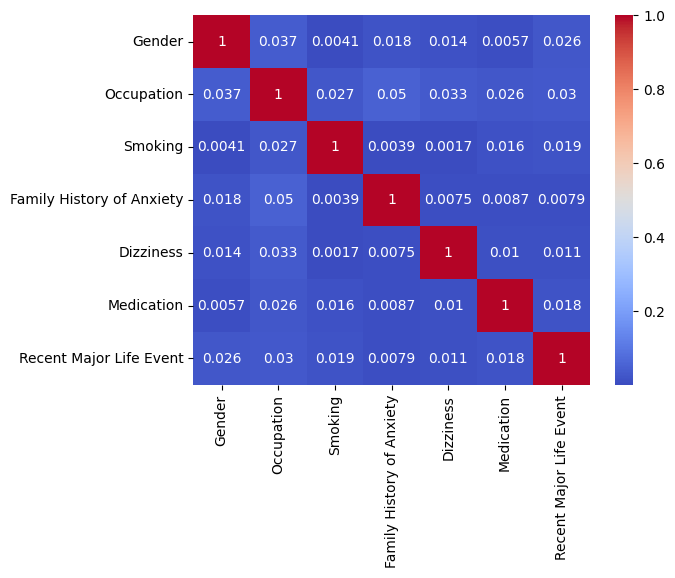

In [23]:
# compute cramer's V in order to measure correlation between categorical variables
def cramers_v(x, y):
    # create a contingency table
    confusion_matrix = pd.crosstab(x, y)

    # calculate the chi2 statistic 
    chi2 = chi2_contingency(confusion_matrix)[0]

    # get the grand total of observations
    n = confusion_matrix.values.sum()

    # calculate the phi2 (normalized chi2)
    phi2 = chi2 / n

    # get numbers of categories for x and y
    r, k = confusion_matrix.shape

    # return the formula for V
    return np.sqrt(phi2 / min(k-1, r-1))

categorical_cols = categorical_variables.columns
cramers_matrix = pd.DataFrame(index=categorical_cols, columns=categorical_cols)

# loop through both rows and columns to get pairs
for col1 in categorical_cols:
    for col2 in categorical_cols:
        cramers_matrix.loc[col1, col2] = cramers_v(anxiety_data[col1], anxiety_data[col2])

# plot the heatmap
cramers_matrix = cramers_matrix.astype(float)
sns.heatmap(cramers_matrix, annot=True, cmap='coolwarm')

From the heatplot, it is apparent that off-diagonal values are very low, all $\leq 0.05$, indicating that there is no association between categorical variables in the data. 

In order to plot categorical variables against **Anxiety Levels (1-10)**, I will write a function `plot_categorical_vars` to call later when I need the plots.

In [24]:
def plot_categorical_vars_grid(dataset, columns):
    """
    Plots multiple categorical variables against Anxiety Level in a grid of boxplots.
    """
    n_cols = 2  # number of plots per row
    n_rows = int(np.ceil(len(columns) / n_cols))
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 5))
    
    for i, column in enumerate(columns):
        ax = axes[i // n_cols, i % n_cols]
        sns.boxplot(data=dataset, x=column, y='Anxiety Level (1-10)', ax=ax, hue = f"{column}")
        ax.set_title(f'Anxiety Level by {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Anxiety Level')
    
    
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.35, wspace=0.3) 
    plt.show()

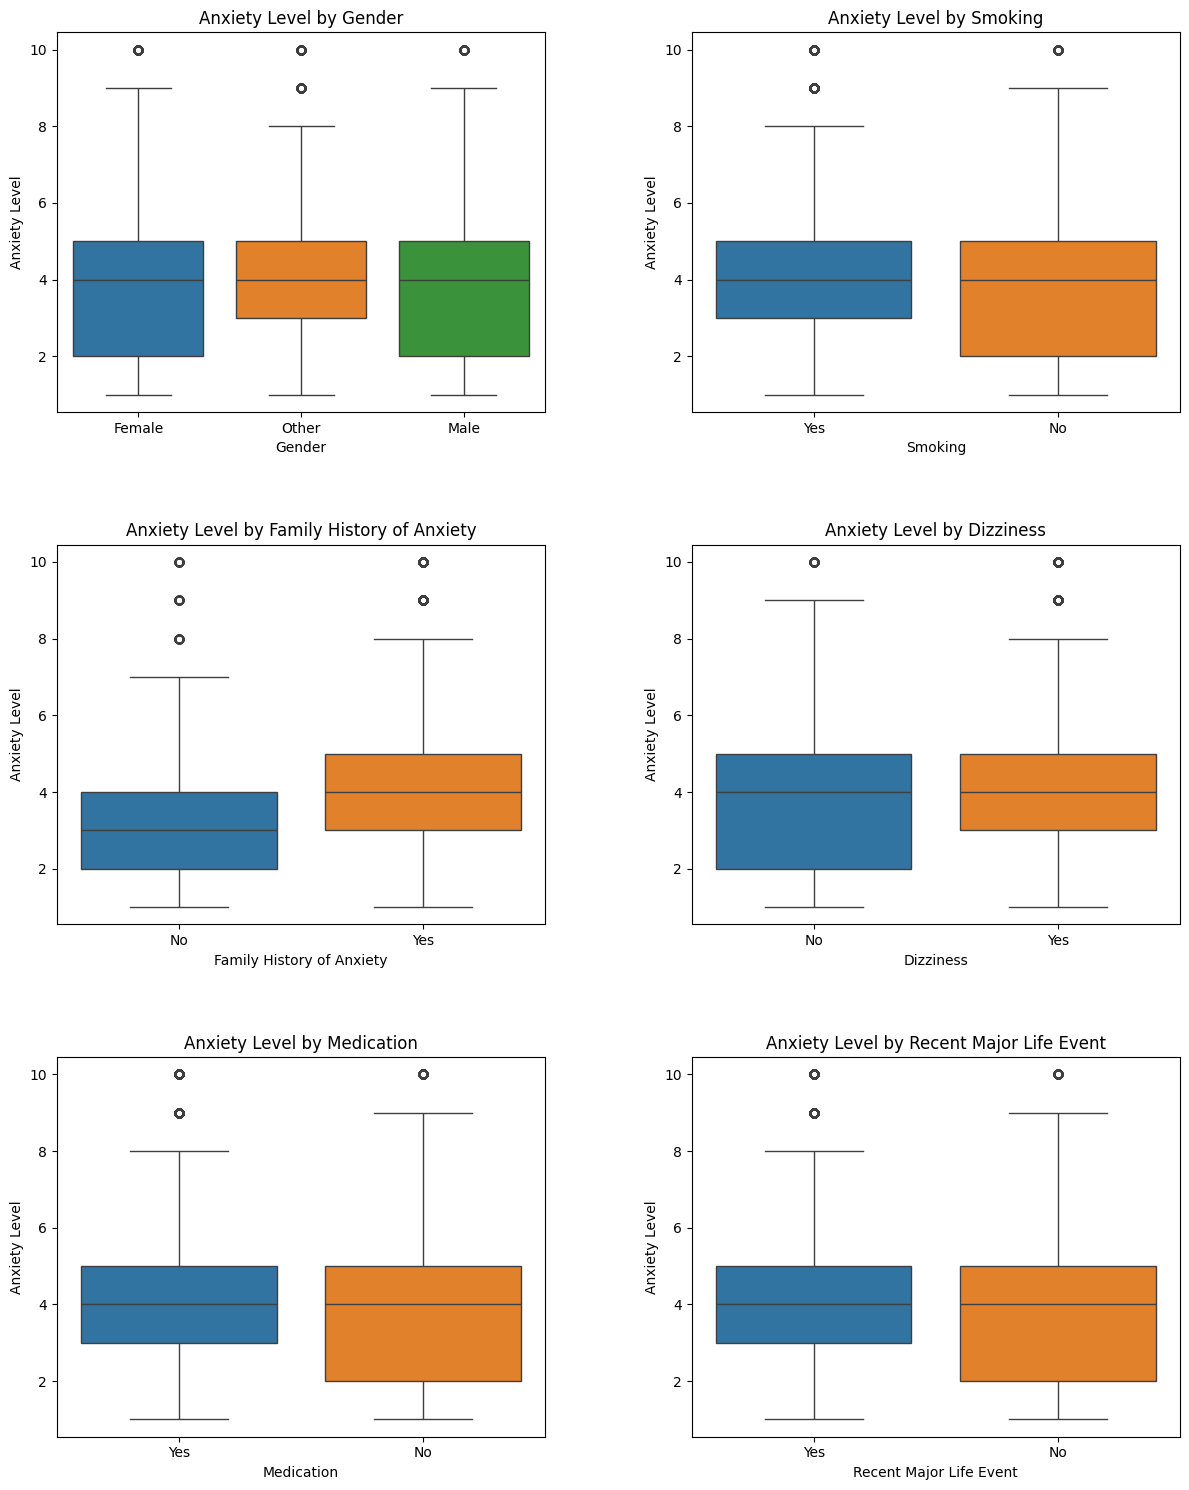

In [25]:
# call the function to plot categorical variables vs anxiety
plot_categorical_vars_grid(anxiety_data, categorical_variables.columns.drop('Occupation'))

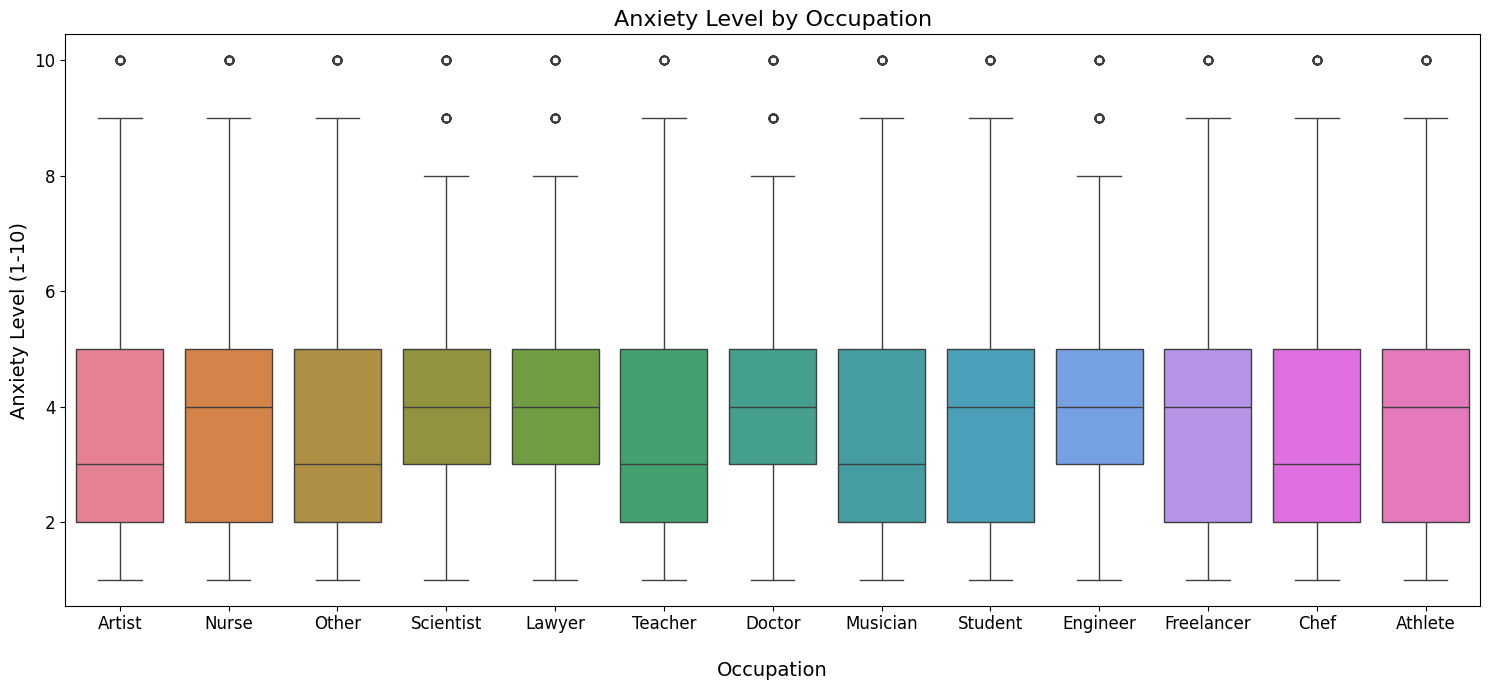

In [26]:
plt.figure(figsize = (15,7))
sns.boxplot(data = anxiety_data, x = "Occupation", y = "Anxiety Level (1-10)", hue = "Occupation")
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12)
plt.xlabel("\nOccupation", fontsize=14)
plt.ylabel("Anxiety Level (1-10)", fontsize=14)
plt.title("Anxiety Level by Occupation", fontsize=16)
plt.tight_layout()
plt.show()

From the plots, it can be seen that people with a **family history of anxiety** report higher mean anxiety levels overall, indicating that this might be a useful predictor during the model building stage. When it comes to other categorical variables, similar mean values are reported across various categories, with one of the categories having a higher lower boundary (25th percentile) than the others, indicating fewer anxiety values. Higher overall **anxiety levels** (meaning a higher range of anxiety scores) are reported by individuals who smoke, experience dizziness, take medications, have  recently experienced a major life event, and identify as the 'other' gender.

While some **occupations** — such as artist, teacher, musician, chef, and other — report consistently lower mean **anxiety levels**, others, including scientist, lawyer, doctor, engineer, nurse, student, freelancer, and athlete, show higher average anxiety. From the plot, it seems that mean anxiety scores are not strongly correlated with the spread (variability) of scores across occupations.

It can also be seen that for all categorical variables, the data entries with the anxiety level of 10 are outliers. I will explore this further later.

I will now focus on features with the moderate to high **Pearson's correlation coefficient**: **Stress Levels**, **Sleep Hours**, **Therapy Sessions**, **Coffee Intake**. When it comes to categorical variables, the average value for anxiety if people have a family history of anxiety is higher than if there is no family history, so I need to confirm that this result is statistically significant.

## Outlier detection

I have seen some outliers from the previous boxplots for categorical variables vs. Anxiety Level. Identifyng these **conditional outliers** with respect to the target can help reveal data points that might affect the model disproportionately. I will now write a function in order to detect **univariate outliers** in the numerical data, since they are not easily seen on a graph. Outliers can worsen the model performance, skew the regression coefficients, and bias statistical test, which is especially undesirable for linear regression. However, handling outliers is not simple, since they could hold valuable insight into the behaviour of the target variable, so removing them is not always an option. The following function will evaluate if the proportion of outliers is substantial compared to the total size of data, and this will guide the decision on how to handle them - if the percentage is small, I will keep them, since they shouldn't greatly affect the model.

In [27]:
def detect_outliers(df, column):
    # calculate 25th percentile
    percentile25 = df[column].quantile(0.25)

    # calculate 75th percentile
    percentile75 = df[column].quantile(0.75)

    # calculate the interquantile range
    iqr = percentile75 - percentile25

    # calculate tresholds for outliers
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr

    # create a Boolean mask to select only relevant rows
    mask = df[(df[column] < lower_limit) | (df[column] > upper_limit)]

    # count number of outliers
    num_outliers = mask.shape[0]
    pct_outliers = num_outliers / len(df) * 100
    print(f"{column}: {num_outliers} outliers ({pct_outliers:.2f}%)")

# apply function to columns
for column in anxiety_data.select_dtypes(include=['int64', 'float64']).columns:
    detect_outliers(anxiety_data, column)

Age: 0 outliers (0.00%)
Sleep Hours: 110 outliers (1.00%)
Physical Activity (hrs/week): 56 outliers (0.51%)
Caffeine Intake (mg/day): 0 outliers (0.00%)
Alcohol Consumption (drinks/week): 0 outliers (0.00%)
Stress Level (1-10): 0 outliers (0.00%)
Heart Rate (bpm): 0 outliers (0.00%)
Breathing Rate (breaths/min): 0 outliers (0.00%)
Sweating Level (1-5): 0 outliers (0.00%)
Therapy Sessions (per month): 178 outliers (1.62%)
Diet Quality (1-10): 0 outliers (0.00%)
Anxiety Level (1-10): 322 outliers (2.93%)


**Since all numerical colums contain $<2 \%$ of outliers (excluding 'Anxiety Level (1-10)', which is the target columns), it is reasonable to keep these records in the data as they are unlikely to significantly impact model performance.** Moreover, keeping these mild outliers preserves the natural variability of the data, which can help the model generalize better.

## Individual predictors vs anxiety levels

### 1. Stress Levels

Both Stress Level and Anxiety Level are discrete numerical variables, so scatterplot, `hexplot` or `linear plot` wouldn't be ideal. The best choice would be a heatmap, with counts the frequency of **Stress** and **Anxiety levels** pairs of values. I will choose to define the following **3 levels of anxiety** in order to understand the data better. 
* **Low (1-3)**
* **Moderate (4-7)**
* **High (8-10)**

In [28]:
# Create anxiety groups
anxiety_data['Anxiety Group'] = pd.cut(   # use pd.cut to bucket anxiety levels into 3 groups: (0-3) low, (4-7) Moderate, (7-10) High
                                        anxiety_data['Anxiety Level (1-10)'], 
                                        bins=[0, 3, 7, 10], 
                                        labels=['Low', 'Moderate', 'High']  # labels argument assigns names to each group for readability
                                        )

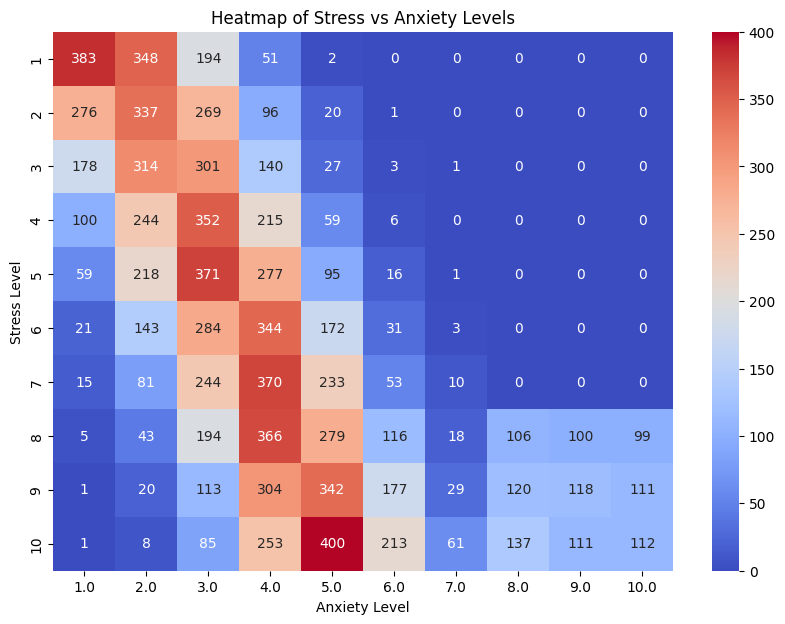

In [29]:
# create a contingency table for stress level and anxiety level
heatmap_data = pd.crosstab(anxiety_data['Stress Level (1-10)'], anxiety_data['Anxiety Level (1-10)'])

# plot a contingency heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap='coolwarm')
plt.title('Heatmap of Stress vs Anxiety Levels')
plt.xlabel('Anxiety Level')
plt.ylabel('Stress Level')
plt.show()

<Axes: xlabel='Stress Level (1-10)', ylabel='Anxiety Group'>

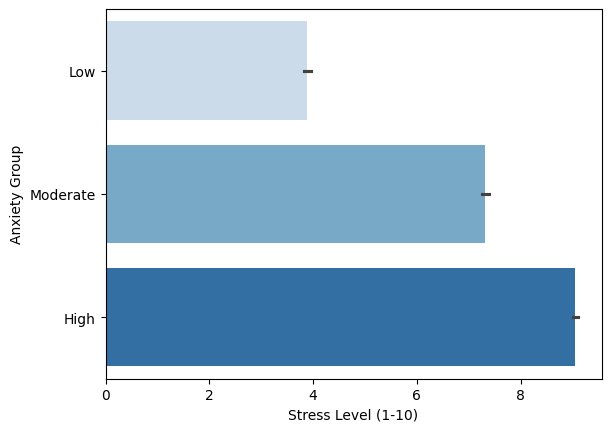

In [30]:
# create a barplot of stress level vs anxiety group (low, moderate, high)
sns.barplot(data = anxiety_data, x='Stress Level (1-10)', y='Anxiety Group', palette = 'Blues', hue='Anxiety Group')


The heatmap confirms a **strong positive correlation between Stress and Anxiety**, and justifies splitting the data into groups of 'low', 'moderate' and 'high' anxiety.  Low stress levels are strongly associated with low anxiety levels, especially with almost no patients reporting higher anxiety levels. For moderate stress levels, there is a wider spread of anxiety levels, concentrated around $4$ or $5$. Hence, for the most part moderate stress levels are associated with moderate anxiety levels. High stress is strongly associated with moderate to high anxiety, with a notable increase of people reporting the highest anxiety levels $8-10$.


### 2. Sleep Hours

**Sleep Hours** is a continuous variable, hence a histogram plot would appropriate for visualizing its relationship with anxiety levels. First, I will explore the overall distribution of sleep based on the data, and then group the data by anxiety levels to see how sleep hours vary across different anxiety levels.

<Axes: xlabel='Sleep Hours', ylabel='Count'>

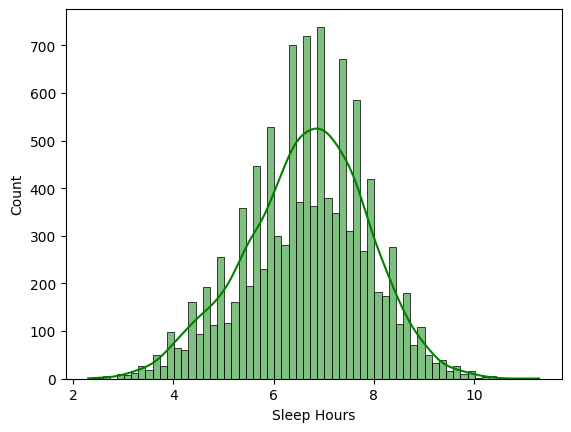

In [31]:
sns.histplot(data=anxiety_data, x='Sleep Hours', kde=True, color = 'green')

The data for **Sleep Hours** looks approximately normally distributed. However for models like Linear Regression this is not a requirement - the requirement is a **normality of the residuals**. To better understand the relationship between sleep and anxiety, I divided **anxiety** into three groups as before: Low, Moderate, and High, and plotted histograms of **Sleep Hours** for each group: 

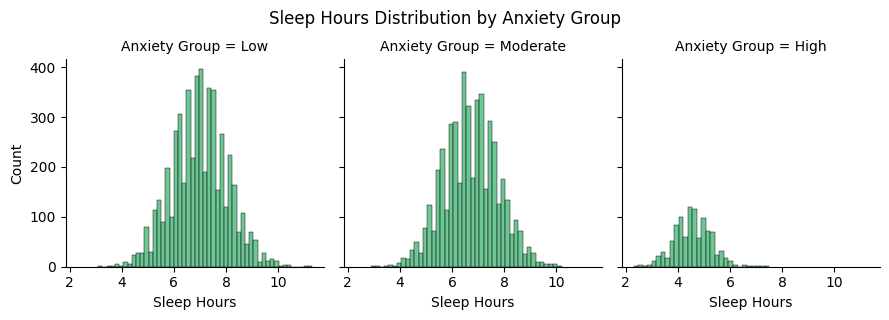

In [32]:
# facetgrid plot by anxiety level boxes
g = sns.FacetGrid(anxiety_data, col='Anxiety Group')  # initializes a FacetGrid, which creates a grid of subplots — one for each Anxiety Group
g.map_dataframe(sns.histplot, x='Sleep Hours', color='mediumseagreen')   # plots a histogram of Sleep Hours for each anxiety group using the corresponding subset of data in each facet
g.fig.suptitle('Sleep Hours Distribution by Anxiety Group', y=1.05) # y=1.05 pushes the title slightly above the plots to avoid overlapping
plt.show()

In [33]:
# group the data by anxiety 
grouped_anxiety = anxiety_data.groupby('Anxiety Group', observed=True)

# calculate the mean sleep hours for each anxiety group
mean_sleep_hours_per_group = grouped_anxiety['Sleep Hours'].mean().round(1)
mean_sleep_hours_per_group = mean_sleep_hours_per_group.rename('Mean Sleep Hours')

# convert to dataframe an count number of entries per group
mean_sleep_per_anxiety_group = pd.DataFrame(mean_sleep_hours_per_group)
mean_sleep_per_anxiety_group['Num People Per Group'] = grouped_anxiety['Sleep Hours'].count()
mean_sleep_per_anxiety_group

,Mean Sleep Hours,Num People Per Group
Anxiety Group,,
Low,7.0,5202
Moderate,6.7,4784
High,4.6,1014


It can be deduced that **individuals with higher anxiety levels report less sleep overall**. People with 'low' and 'moderate' anxiety levels report on average about $7$ hours of sleep, contrasting with $4.6$ hours for people experiencing high anxiety levels. This indicates that sleep hours could be a significant predicting variable during the modelling stage, since this $2$ hour reduction suggest a notable difference. Additionally, this dataset contains fewer individuals with high anxiety, as noticed before in the target distribution plot, and this should be kept in mind during the later stages.

### 3. Therapy Sessions (per month)

Here, I will plot a contingency heatmap to reveal the counts for **therapy sessions** depending on **anxiety level (1-10)**. Additionally, I will do a barplot to compare the number of people per month to attend **therapy sessions** based on their **anxiety group (low, moderate or high)**.

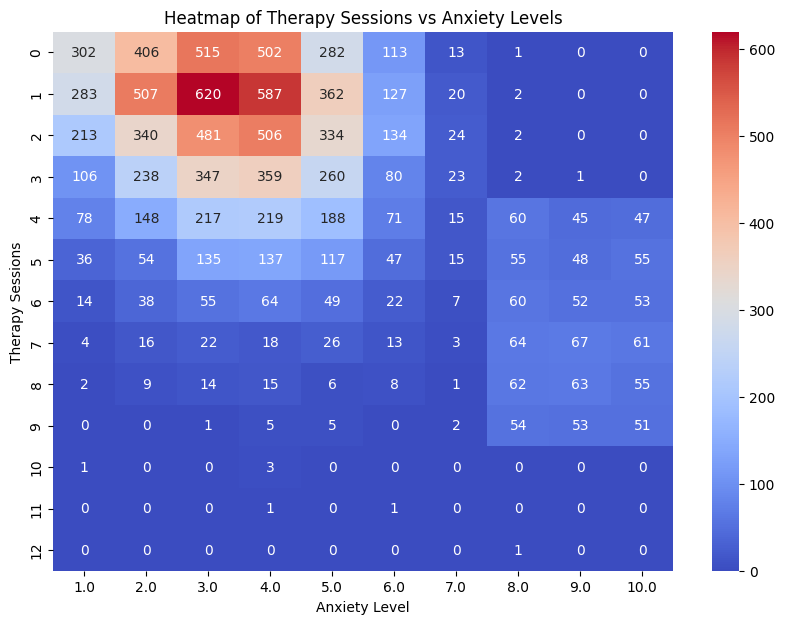

In [34]:
# create a contingency table for therapy sessions vs anxiety
heatmap_therapy = pd.crosstab(anxiety_data['Therapy Sessions (per month)'], anxiety_data['Anxiety Level (1-10)'])

# create a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(heatmap_therapy, annot=True, fmt="d", cmap='coolwarm')
plt.title('Heatmap of Therapy Sessions vs Anxiety Levels')
plt.xlabel('Anxiety Level')
plt.ylabel('Therapy Sessions')
plt.show()

<Axes: xlabel='Therapy Sessions (per month)', ylabel='Anxiety Group'>

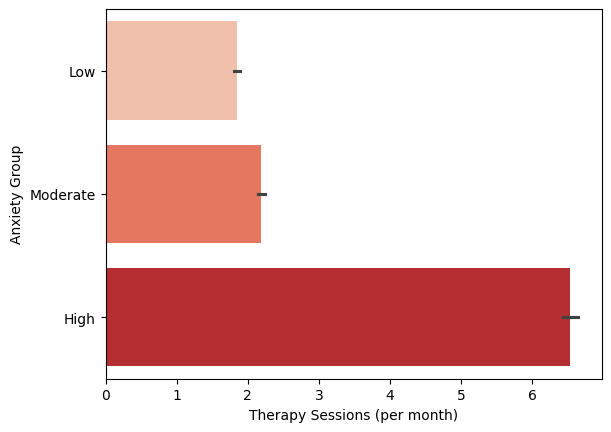

In [35]:
# create a barplot for therapy session vs anxiety group (low, medium, high)
sns.barplot(data = anxiety_data, x='Therapy Sessions (per month)', y='Anxiety Group', palette = 'Reds', hue='Anxiety Group')

The heatmap reveals that **individuals who report low to moderate anxiety level attend fewer therapy sessions per month**, predominantly up to 2 sessions. **Individuals with higher anxiety levels report more frequent therapy sessions**, with a significant portion of people attending 5 to 6 sessions a month. Attendance of 10+ sessions is rare across all anxiety levels, with no discernible pattern. This analysis suggests including **"Therapy Sessions"** as a valuable predicting variable for modeling anxiety levels.

### 4. Caffeine Intake (mg/day)

**Caffeine intake** is a continuous numerical variable, and I now do 2 boxplots: the first boxplot will compare it to anxiety levels on a scale (1-10), and the second one will look at anxiety groups ('low', 'moderate' and 'high'):

<Axes: xlabel='Anxiety Level (1-10)', ylabel='Caffeine Intake (mg/day)'>

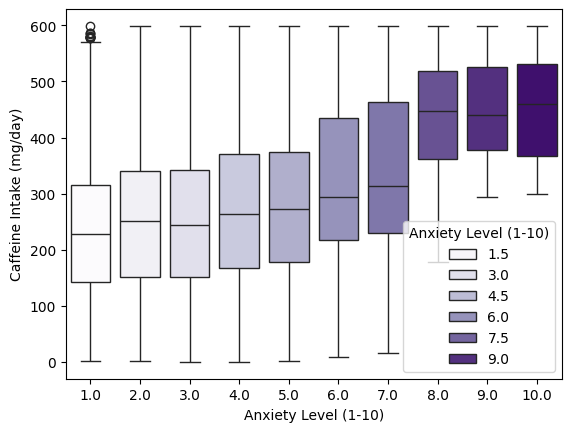

In [36]:
# create a boxplot of caffeine intake vs anxiety levels (1-10)
sns.boxplot(data=anxiety_data, x='Anxiety Level (1-10)', y='Caffeine Intake (mg/day)', palette = 'Purples', hue = 'Anxiety Level (1-10)')

<Axes: xlabel='Anxiety Group', ylabel='Caffeine Intake (mg/day)'>

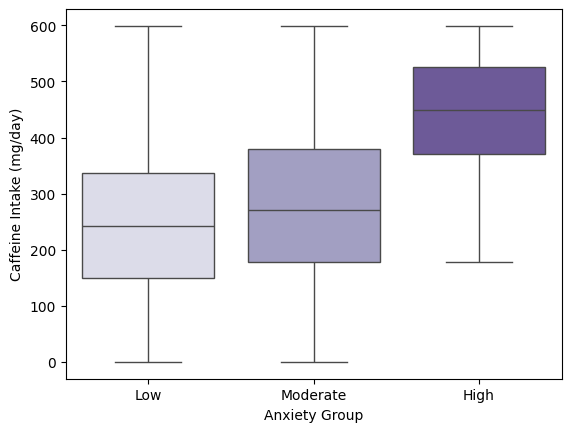

In [37]:
# create a boxplot of caffeine intake vs anxiety group (low, moderate, high)
sns.boxplot(data=anxiety_data, x='Anxiety Group', y='Caffeine Intake (mg/day)', palette = 'Purples', legend=False, hue = 'Anxiety Group')

From the plot, it is apparent that **people with lower to moderate anxiety levels consume on average lower amounts of caffeine**, about $250$mg per day, while **high-anxiety individuals report significantly higher caffeine consumption**, averaging about $450$mg per day.

### 5. Family History Of Anxiety

To see the distribution of **anxiety levels** depending on the preexisting **family history of anxiety**, I will do a **violin plot** to visualize the data:

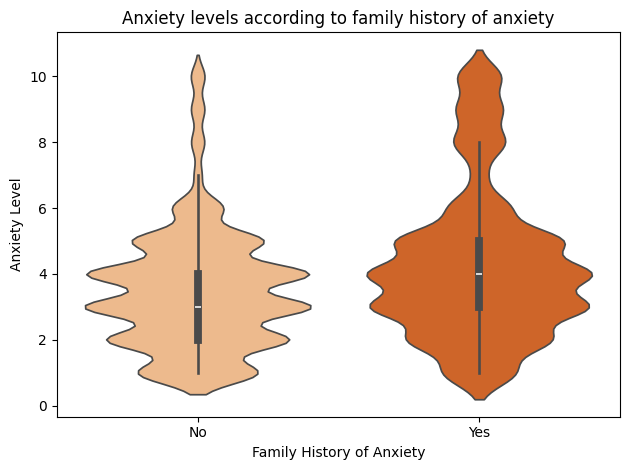

In [38]:
# create a violinplot of family history vs anxiety level (1-10)
sns.violinplot(data=anxiety_data, x='Family History of Anxiety', y='Anxiety Level (1-10)', palette = 'Oranges', hue='Family History of Anxiety')
plt.title("Anxiety levels according to family history of anxiety")
plt.xlabel('Family History of Anxiety')
plt.ylabel('Anxiety Level')
plt.tight_layout()
plt.show()

In [39]:
#  group the data by family history
grouped_history = anxiety_data.groupby('Family History of Anxiety')

# calculate the mean value of anxiety per group
mean_anxiety_history = grouped_history['Anxiety Level (1-10)'].mean()
mean_anxiety_history.name = 'Mean Anxiety Value'

# convert to a dataframe
pd.DataFrame(mean_anxiety_history)

,Mean Anxiety Value
Family History of Anxiety,
No,3.497768
Yes,4.309731


From the violin plot, it is evident that **people with no family anxiety history report lower levels of anxiety than their counterparts** (about $3.5$ on the anxiety scale on average) with very few cases of high anxiety. On the contrary, **those with a family history of anxiety exhibit higher average anxiety levels**, about $4.3$ on a scale, with a greater proportion of individuals having high anxiety levels $8-10$.

### Interactions between variables

I will now examine if there are relationships between predictor variables, and how they relate to anxiety levels. The result of this analysis could be a good indication whigh interaction terms to include during the model building stage, in order to get a better performing model.

#### Stress levels vs. Sleep hours, colored by Anxiety level



Text(0.5, 1.0, 'Stress vs Sleep Colored by Anxiety Level')

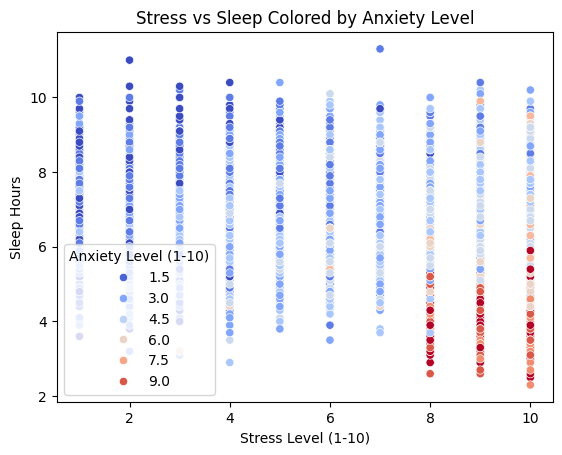

In [40]:
sns.scatterplot(data=anxiety_data,
                x='Stress Level (1-10)',
                y='Sleep Hours',
                hue='Anxiety Level (1-10)',
                palette='coolwarm')
plt.title("Stress vs Sleep Colored by Anxiety Level")

From the scatterplot, it is apparent that **people who both sleep less and have a higher amount of stress experience more severe anxiety than others**. This is to be expected, since sleep deprivation and high stress are both individually linked to anxiety, their combination likely amplifies it.

#### Caffeine intake vs. Anxiety group, colored by Stress group



Text(0.5, 1.0, 'Caffeine Intake vs Anxiety group colored by Stress group')

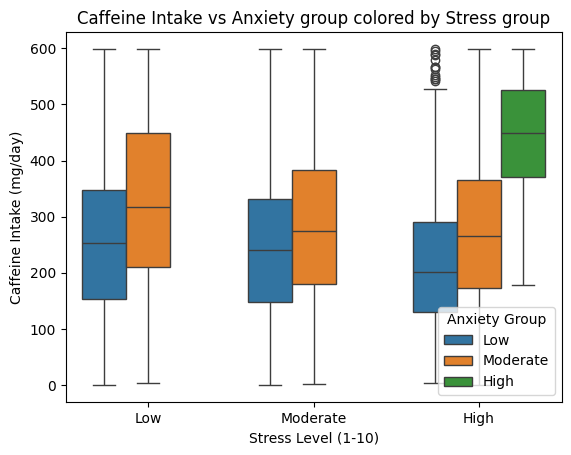

In [41]:
stress_level_groups = pd.cut(anxiety_data['Stress Level (1-10)'], bins=[0, 3, 7, 10], 
                            labels=['Low', 'Moderate', 'High'])

sns.boxplot(data=anxiety_data,
            x=stress_level_groups,
            y='Caffeine Intake (mg/day)',
            hue='Anxiety Group',
            palette='tab10')

plt.legend(title='Anxiety Group')
plt.title("Caffeine Intake vs Anxiety group colored by Stress group")

In Low and Moderate stress groups, I only see Low and Moderate Anxiety boxes. In the high stress group, I see the high anxiety group, with the highest caffeine intake values of all boxes. This supports the earlier observation that high anxiety is mostly observed when stress is high, and that’s when caffeine intake is also elevated. The absence of high anxiety boxes for the low and moderate stress levels shows a conditional relationship, meaning that **both high caffeine intake and high stress levels are associated with high anxiety**. This suggest that the relationship should be included as an interaction term during modelling.

#### Age vs. Anxiety colored by Gender

<Axes: xlabel='Anxiety Group', ylabel='Age'>

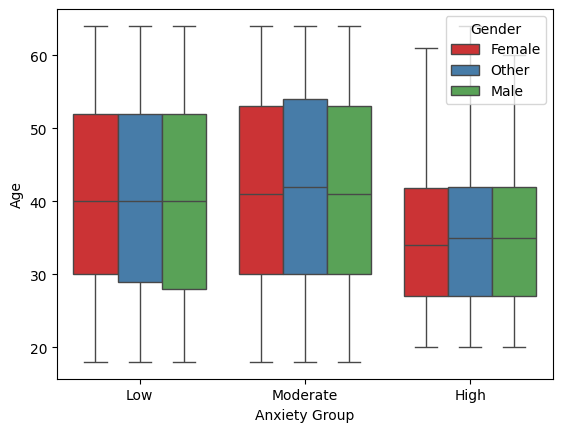

In [42]:
sns.boxplot(data = anxiety_data, y = 'Age', x = 'Anxiety Group', hue = 'Gender', palette = 'Set1')

**Younger individuals often report higher anxiety levels**, especially adolescents and early adults. This could be due to internal pressures and external influences, like the rise of social media, rising living costs, career uncertainty, rising global issues like climate change etc. In contrast, the **difference in anxiety levels across different genders is minimal**.

## Key Takeaways

* There are **no missing values or duplicates** in the data.
* There is only a small proportion of **outliers** detected in the data, so they were retained.
* The target variable **anxiety level** has a **right-skewness**, which may influence modeling assumptions.
* The strongest (linear) numerical predictors of anxiety are **stress levels**, **therapy sessions per month**, **sleep hours** and **caffeine intake**, as seen from the correlation heatmap.
* With the exception of predictors **therapy sessions** and **sleep hours**, which are moderately correlated, other correlations between numerical predictors are minimal. This suggests minimal multicolinearity, however, this assumption will be formally checked using Variance Inflation Factors.
* Regarding categorical variables and their relationship with anxiety:
    *  Higher overall anxiety levels are observed in people who **smoke, experience dizziness, take  medications, have  recently experienced a major life event.**
    *  Certain **occupations**, like  **nurses**, **lawyers**, **scientists**, **doctors**, **students**, **engineers**, **freelancers** and **athletes** report higher average anxiety scores compared to others.
    * Individuals with a **family history of anxiety** report on average higher levels of anxiety than people without it.
    * People identifying as **'Other' gender** show somewhat higher anxiety levels.
    * **Younger people in their 30s** report higher anxiety levels than people in their 40s and 50s.
* **Categorical variables are not correlated**, which reduces concerns about multicolinearity in one-hot encoding.


**Next Steps**:
* Investigate nonlinear relationships and interaction effects between predictors, which may influence anxiety.
* Conduct statistical tests (e.g., t - tests, ANOVA, Kruskal - Wallis, chi - square) to confirm whether differences in anxiety across categorical groups are statistical significant.